Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy import optimize
import math

Importing dataset

In [3]:
# Specifying simulation directory and the directory to save results in
wdir = str(input('Enter simulation directory path: '))

# Specifying a snapshot for temporal analysis
sdir = wdir + 'temporal_analysis/'

# Create a directory to store correlation plots
if not os.path.exists(sdir + 'correlation_plots/'):
    os.makedirs(sdir + 'correlation_plots/')

Enter simulation directory path: /Users/thepoetoftwilight/Documents/CASSI2020/CASSI2020-Code+Results/Results/m10q_res250/


In [4]:
# Read in all metals and find store directories to all metals
metal_df = pd.read_csv((sdir + 'metal_list.csv'))
metals = metal_df['metals'].to_list()

spath_metals = {}

for m in metals:
    spath_metals[m] = sdir + m + '/'
    
params_df = {}
mus = {}
means_mass = {}
medians_mass = {}
means_vol = {}
medians_vol = {}
stds = {}
sigmas = {}

for m in metals:
    params_df[m] = pd.read_csv(spath_metals[m] + 'data/fit/fit_{}_params.csv'.format(m))
    mus[m] = params_df[m]['mu'].to_list()
    means_mass[m] = params_df[m]['mean_mass'].to_list()
    medians_mass[m] = params_df[m]['median_mass'].to_list()
    means_vol[m] = params_df[m]['mean_vol'].to_list()
    medians_vol[m] = params_df[m]['median_vol'].to_list()
    stds[m] = params_df[m]['std'].to_list()
    sigmas[m] = params_df[m]['sigma'].to_list()

In [5]:
# Obtained statistics for the fitted snapshots

fitted_df = pd.read_csv(sdir + 'fitted_snap_stats.csv')

print(fitted_df)

fitted_indices = fitted_df['snap'].to_list()
num_snaps = len(fitted_indices)

# Get various properties of the galaxies

halo_masses = fitted_df['halo_mass'].to_list()

redshifts = fitted_df['redshift'].to_list()
times = fitted_df['time'].to_list()

# Getting sound related properties

velocities_mass = fitted_df['velocity_mass'].to_list()
velocities_vol = fitted_df['velocity_vol'].to_list()
velocities_spread = fitted_df['velocity_spread'].to_list()

sounds_mass = fitted_df['sound_mass'].to_list()
sounds_vol = fitted_df['sound_vol'].to_list()
sounds_spread = fitted_df['sound_spread'].to_list()

thermals_mass = fitted_df['thermal_mass'].to_list()
thermals_vol = fitted_df['thermal_vol'].to_list()
thermals_spread = fitted_df['thermal_spread'].to_list()

mach_numbers_mass = fitted_df['mach_number_mass'].to_list()
mach_numbers_vol = fitted_df['mach_number_vol'].to_list()

# Getting star-formation properties

SFRs_10 = fitted_df['SFR@10Myr'].to_list()
SFRs_100 = fitted_df['SFR@100Myr'].to_list()
SFRs_1000 = fitted_df['SFR@1000Myr'].to_list()

     Unnamed: 0  Unnamed: 0.1  snap  redshift       time     halo_mass  \
0             0             0   110  3.266667   2.008803  2.786898e+09   
1             1             1   111  3.238411   2.028696  2.959412e+09   
2             2             2   112  3.210526   2.048648  3.048775e+09   
3             3             3   113  3.183007   2.068659  3.119460e+09   
4             4             4   114  3.155844   2.088728  3.178012e+09   
..          ...           ...   ...       ...        ...           ...   
446         447           447   596  0.000637  13.789874  8.534205e+09   
447         448           448   597  0.000478  13.792092  8.534372e+09   
448         449           449   598  0.000319  13.794310  8.534627e+09   
449         450           450   599  0.000159  13.796529  8.534806e+09   
450         451           451   600  0.000000  13.798747  8.534961e+09   

     SFR@10Myr  SFR@100Myr  SFR@1000Myr  velocity_mass  ...  thermal_mass  \
0     0.001611    0.001169     0.0

     spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  spread_s  \
0    0.380999  0.364220  0.407493   0.407376   0.402856   0.399732  0.391235   
1    0.376134  0.360064  0.400233   0.400114   0.395746   0.392655  0.384214   
2    0.350759  0.345432  0.366584   0.366566   0.363109   0.359794  0.352890   
3    0.373829  0.370516  0.394177   0.394068   0.390732   0.387484  0.380568   
4    0.241219  0.186104  0.318819   0.318530   0.317670   0.319912  0.318692   
..        ...       ...       ...        ...        ...        ...       ...   
446  0.071745  0.073939  0.078196   0.078351   0.078153   0.088908  0.094892   
447  0.070472  0.071944  0.078945   0.079202   0.078913   0.089470  0.095393   
448  0.068649  0.070093  0.077397   0.077644   0.077358   0.088164  0.094096   
449  0.068381  0.069624  0.077609   0.077828   0.077556   0.088523  0.094424   
450  0.068585  0.070057  0.076898   0.077142   0.076870   0.086523  0.092058   

     spread_ca  spread_fe  
0     0.380

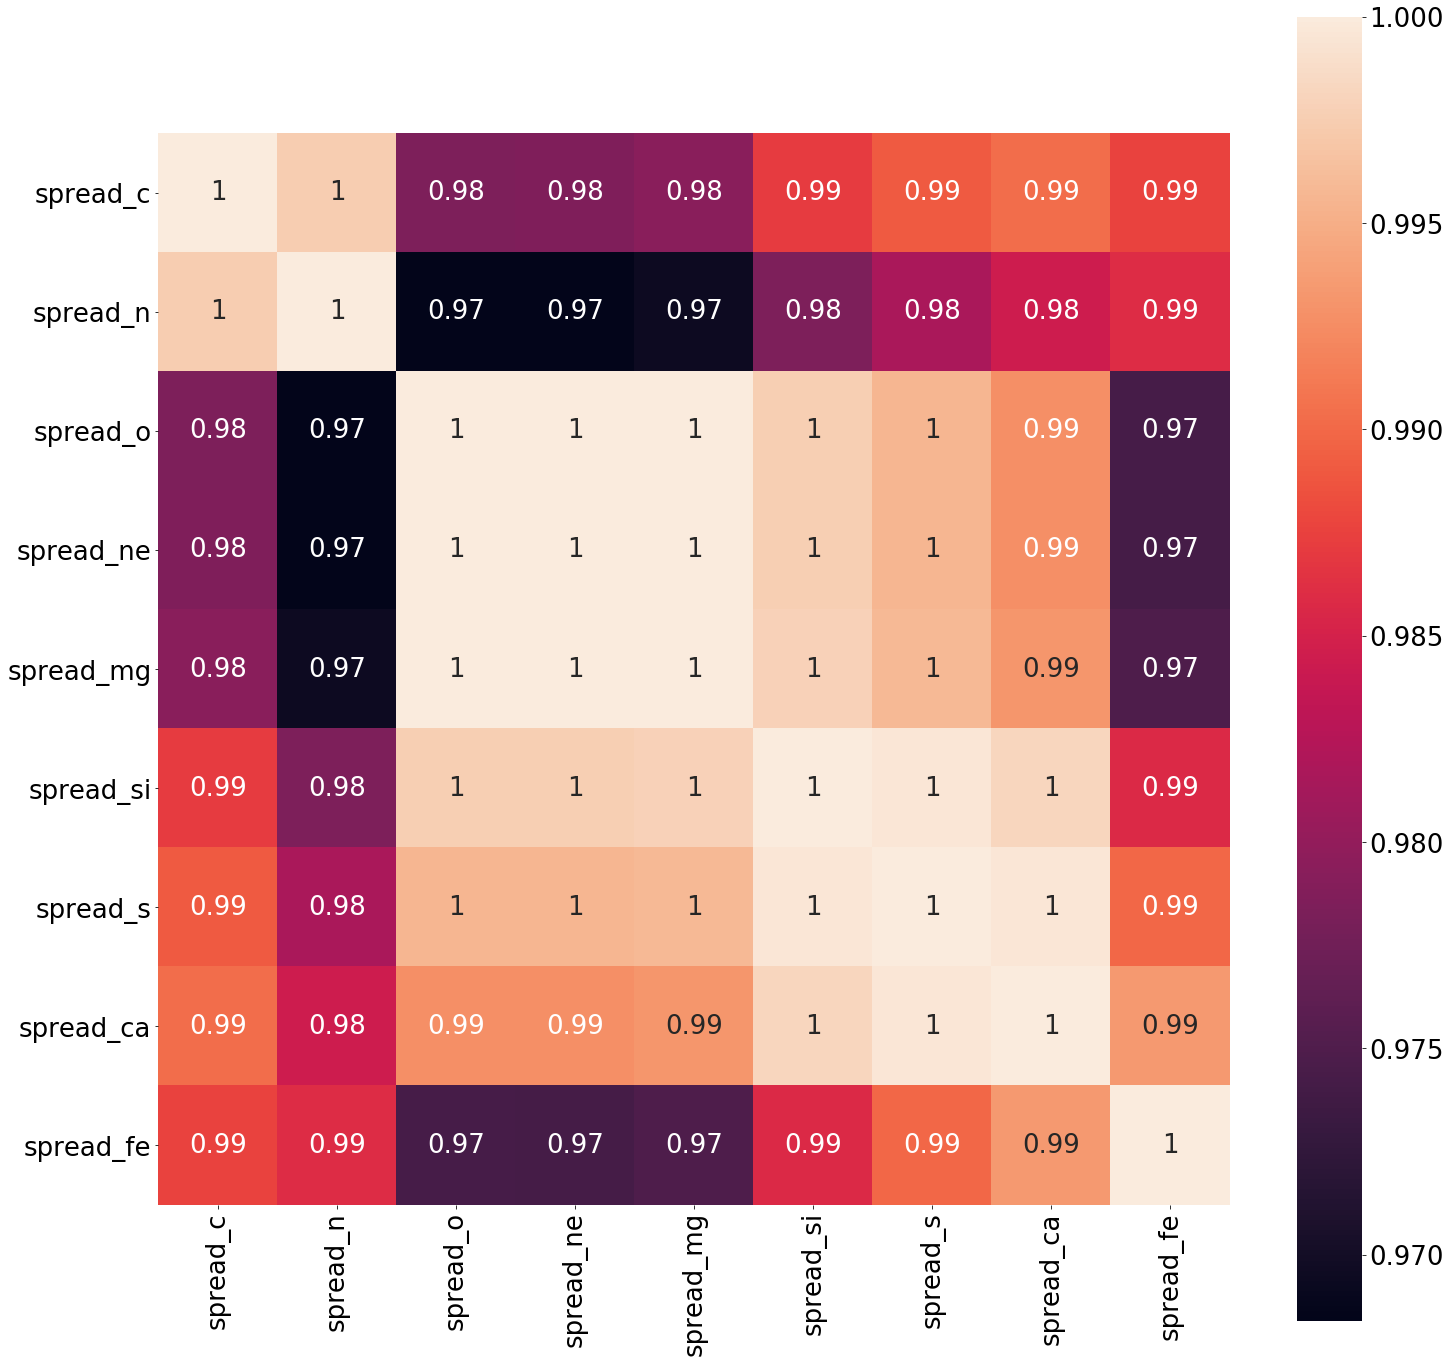

In [6]:
# Correlating abundance spread of all elements with each other

columns_spread = ['spread_' + m for m in metals]

spread_df = pd.DataFrame(columns = columns_spread)

for m in metals:
    spread_df['spread_' + m] = params_df[m]['std']
    
print(spread_df)
    
spread_corr = spread_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_corr.png')
plt.show()
plt.close()

     cent_mass_c  cent_mass_n  cent_mass_o  cent_mass_ne  cent_mass_mg  \
0      -2.199921    -2.607189    -1.916933     -1.850180     -2.091201   
1      -2.107883    -2.498709    -1.836583     -1.769537     -2.011034   
2      -2.007723    -2.395229    -1.733406     -1.666041     -1.907975   
3      -2.052550    -2.489232    -1.724195     -1.656826     -1.898856   
4      -1.949174    -2.369128    -1.625006     -1.559021     -1.800186   
..           ...          ...          ...           ...           ...   
446    -0.937612    -1.169689    -0.988337     -0.924576     -1.163268   
447    -0.936933    -1.168458    -0.988044     -0.924348     -1.162906   
448    -0.937002    -1.168846    -0.988333     -0.924493     -1.163114   
449    -0.936789    -1.168764    -0.988511     -0.924358     -1.163248   
450    -0.936275    -1.168483    -0.988095     -0.923825     -1.162870   

     cent_mass_si  cent_mass_s  cent_mass_ca  cent_mass_fe  
0       -2.077893    -2.131008     -2.407067     -

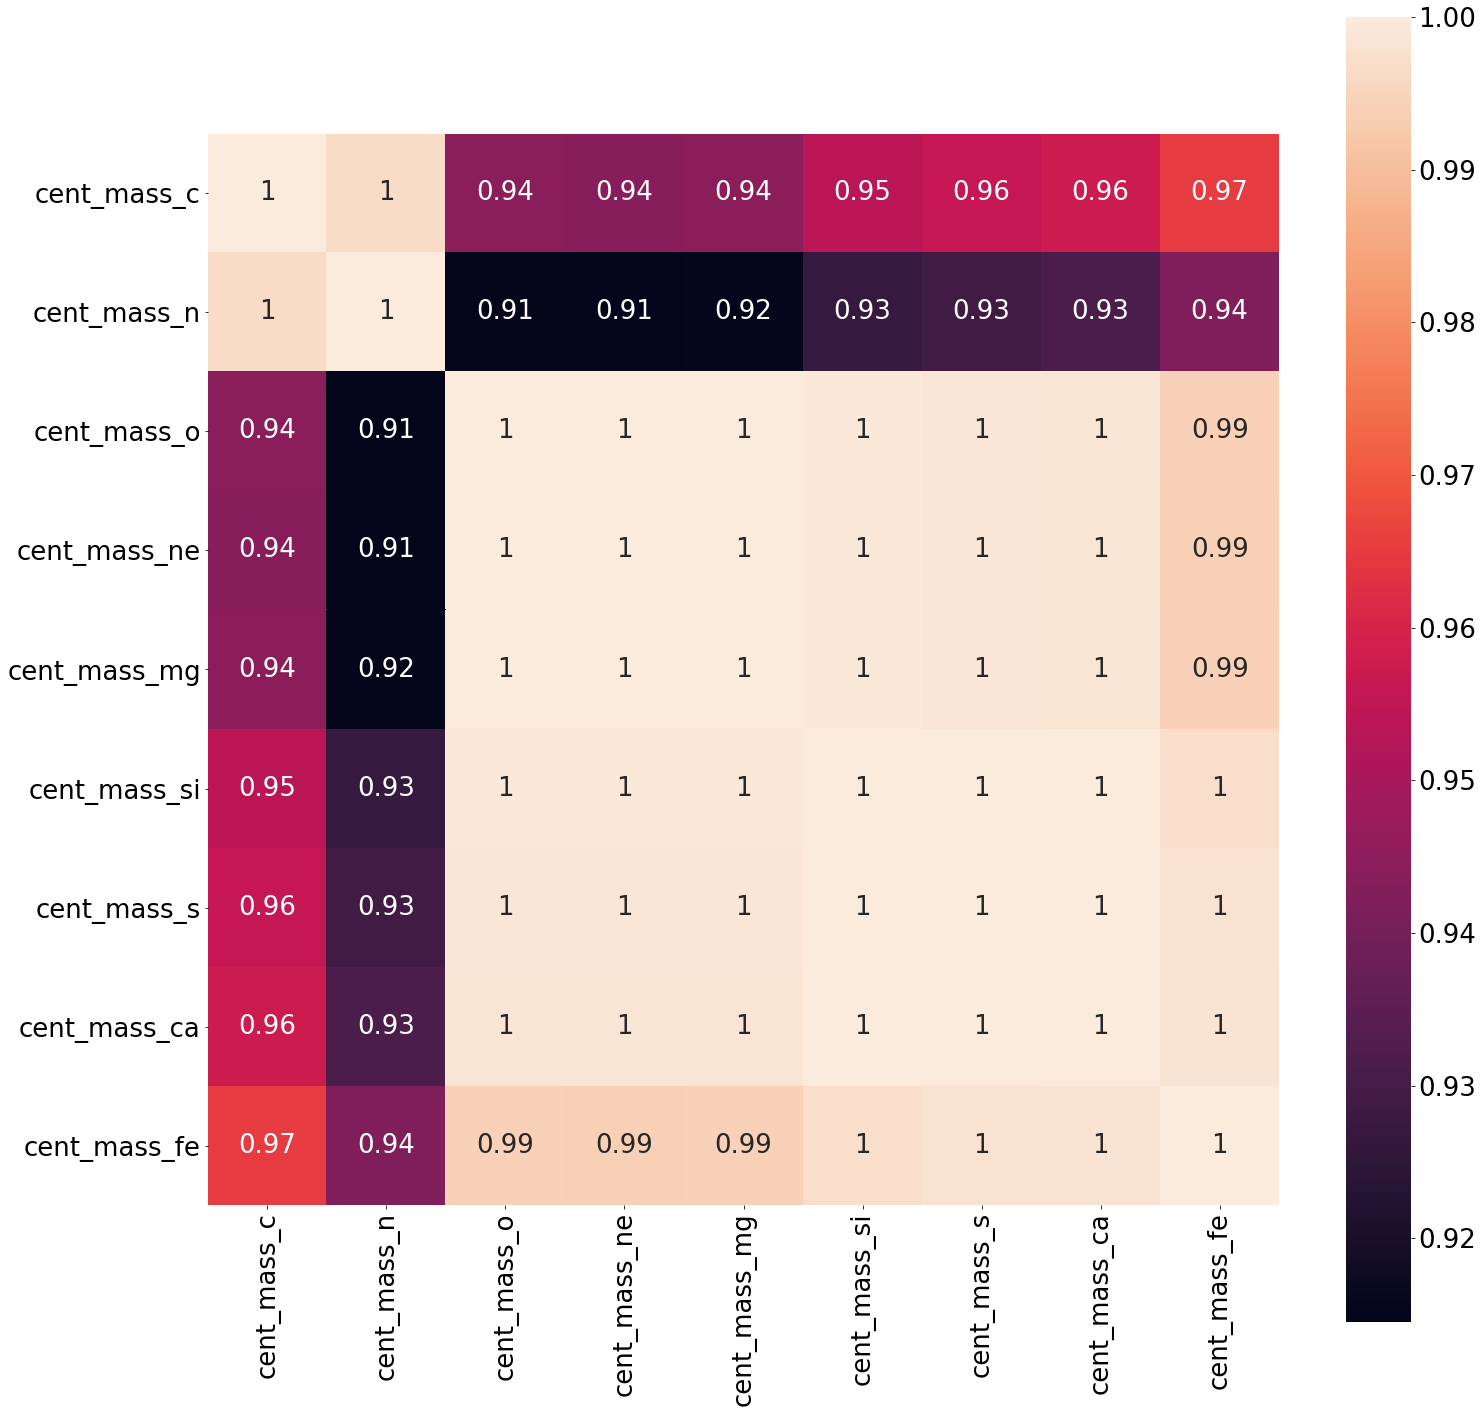

In [7]:
columns_cent_mass = ['cent_mass_' + m for m in metals]

cent_mass_df = pd.DataFrame(columns = columns_cent_mass)

for m in metals:
    cent_mass_df['cent_mass_' + m] = params_df[m]['median_mass']
    
print(cent_mass_df)
    
cent_mass_corr = cent_mass_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_mass_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_mass_corr.png')
plt.show()
plt.close()

     cent_vol_c  cent_vol_n  cent_vol_o  cent_vol_ne  cent_vol_mg  \
0     -2.223682   -2.642074   -1.930917    -1.863957    -2.104886   
1     -2.208137   -2.620033   -1.926889    -1.859664    -2.101055   
2     -2.208770   -2.618202   -1.915805    -1.848448    -2.089754   
3     -2.079265   -2.538916   -1.739188    -1.671950    -1.913890   
4     -1.820880   -2.306163   -1.420980    -1.355391    -1.596700   
..          ...         ...         ...          ...          ...   
446   -0.972471   -1.207541   -1.002313    -0.941129    -1.180428   
447   -0.970924   -1.205364   -0.996718    -0.932718    -1.171771   
448   -0.958776   -1.193526   -0.996032    -0.931305    -1.170849   
449   -0.952642   -1.191439   -0.995184    -0.930969    -1.170154   
450   -0.952641   -1.191437   -0.994831    -0.930772    -1.169887   

     cent_vol_si  cent_vol_s  cent_vol_ca  cent_vol_fe  
0      -2.093262   -2.146563    -2.423126    -2.469246  
1      -2.090105   -2.144072    -2.421784    -2.467793  


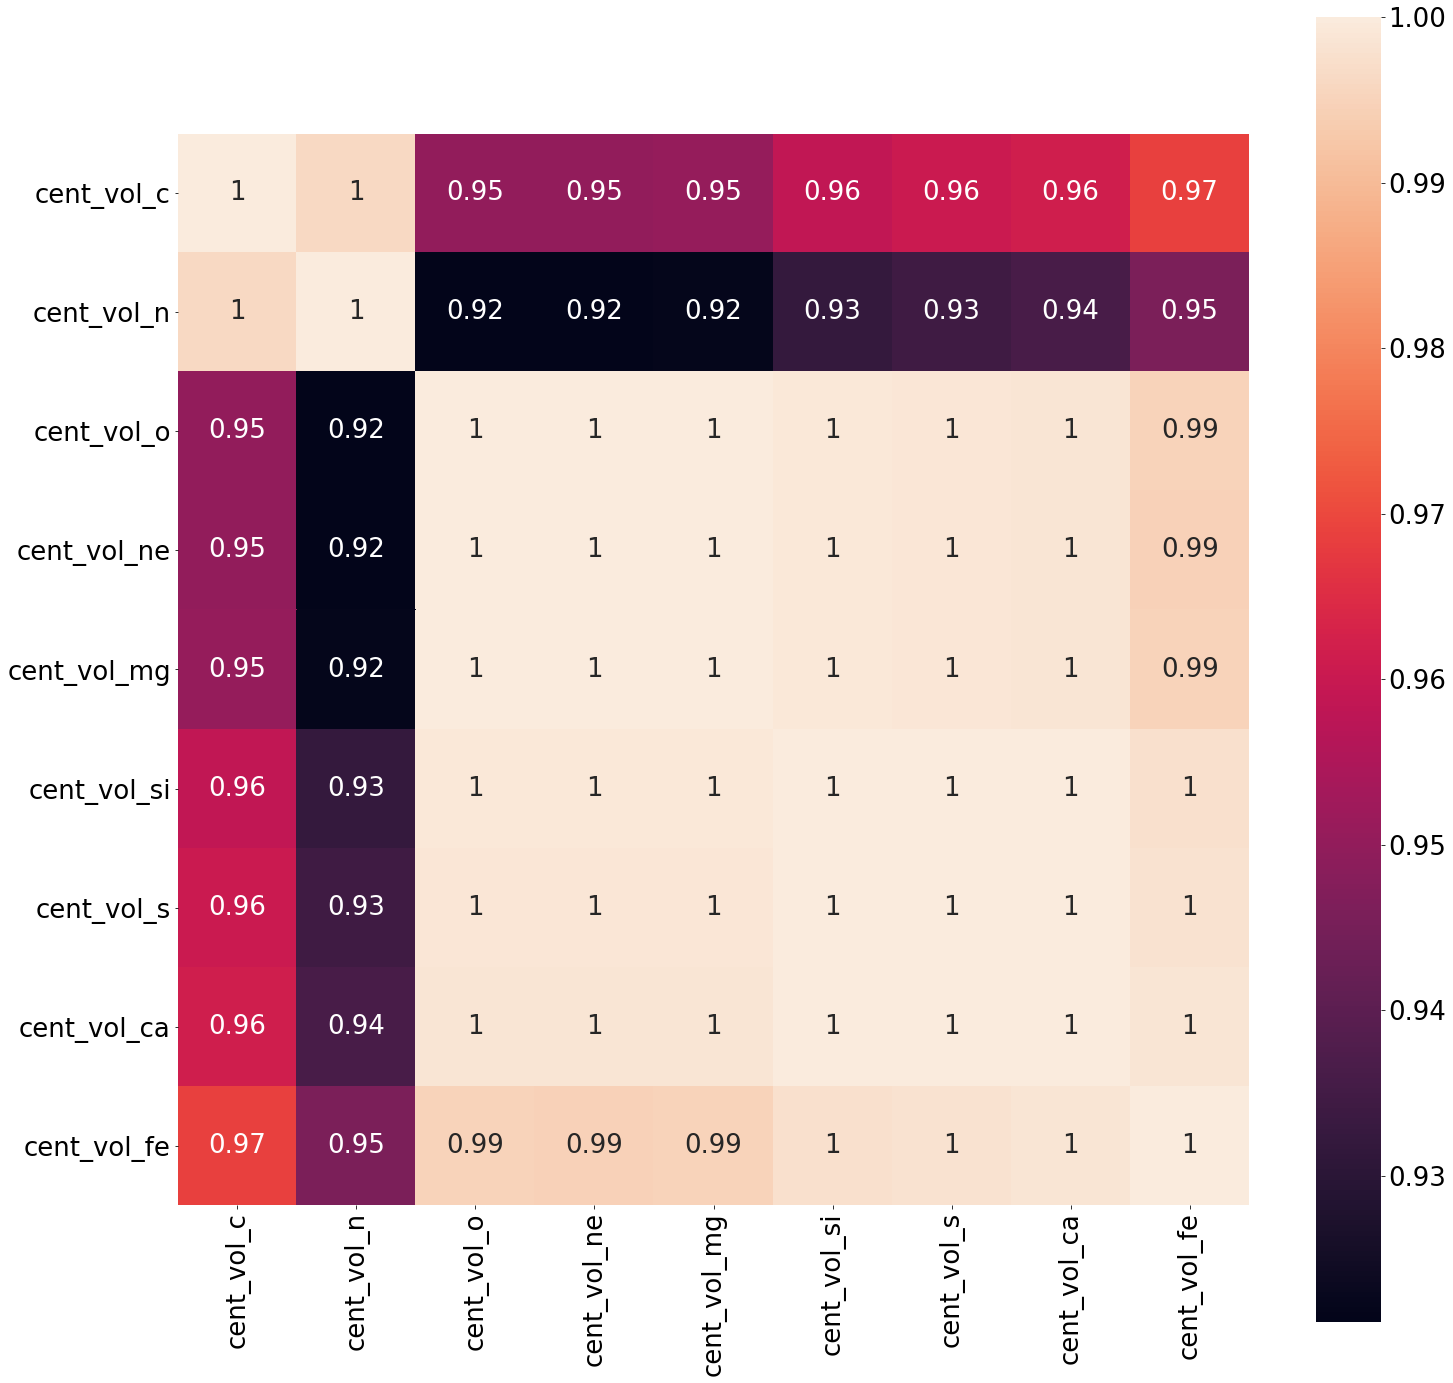

In [8]:
columns_cent_vol = ['cent_vol_' + m for m in metals]

cent_vol_df = pd.DataFrame(columns = columns_cent_vol)

for m in metals:
    cent_vol_df['cent_vol_' + m] = params_df[m]['median_vol']
    
print(cent_vol_df)
    
cent_vol_corr = cent_vol_df.corr()

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_vol_corr.png')
plt.show()
plt.close()

             cent_mass_c  cent_mass_n  cent_mass_o  cent_mass_ne  \
cent_vol_c      0.996651     0.991723     0.946808      0.946703   
cent_vol_n      0.994299     0.996577     0.918650      0.918469   
cent_vol_o      0.941749     0.912401     0.997153      0.997133   
cent_vol_ne     0.941651     0.912231     0.997129      0.997130   
cent_vol_mg     0.942360     0.913087     0.997145      0.997136   
cent_vol_si     0.950849     0.923529     0.996388      0.996321   
cent_vol_s      0.952649     0.925775     0.996040      0.995960   
cent_vol_ca     0.953974     0.927464     0.995724      0.995628   
cent_vol_fe     0.961115     0.937610     0.991778      0.991531   

             cent_mass_mg  cent_mass_si  cent_mass_s  cent_mass_ca  \
cent_vol_c       0.947418      0.956365     0.958286      0.959930   
cent_vol_n       0.919339      0.930362     0.932762      0.934817   
cent_vol_o       0.997157      0.996735     0.996430      0.996111   
cent_vol_ne      0.997145      0.996666

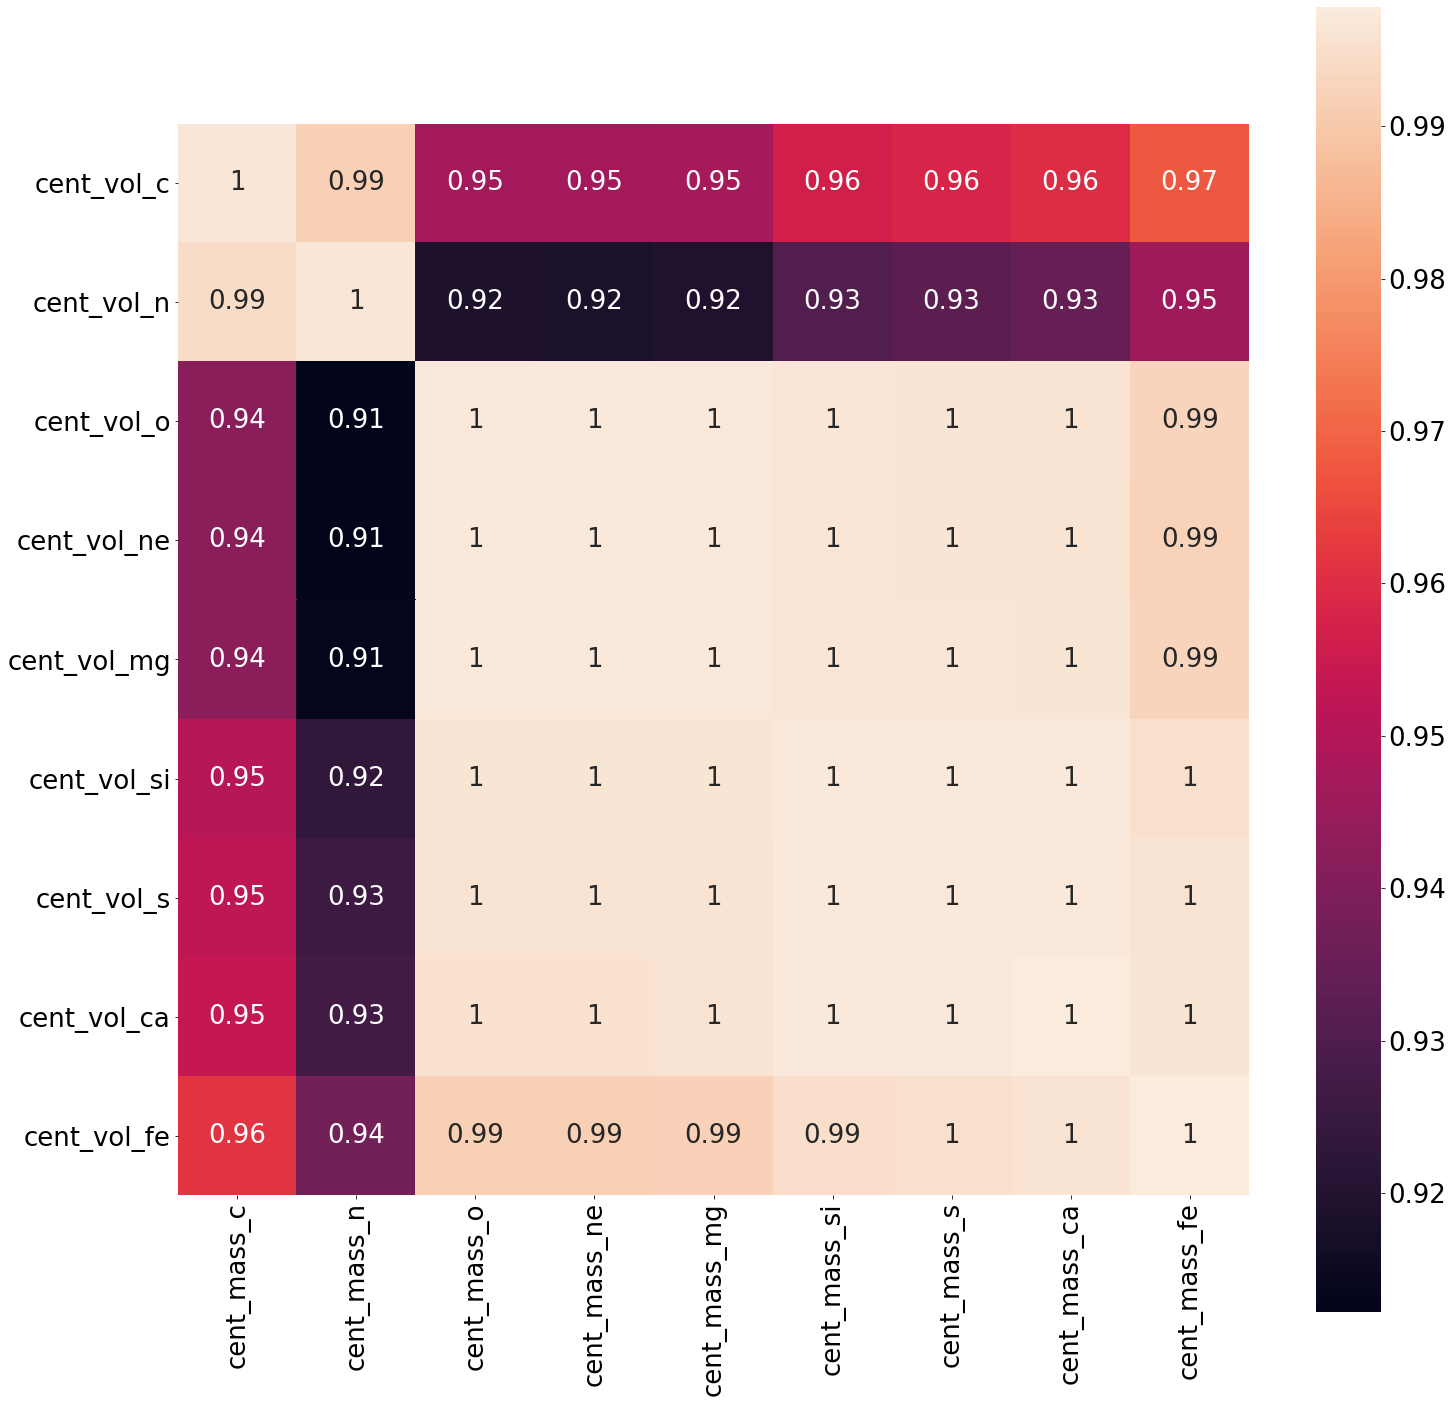

In [9]:
cent_mass_cent_vol_corr = pd.concat([cent_vol_df, cent_mass_df], axis=1, 
                                keys=['cent_vol_df', 'cent_mass_df']).corr().loc['cent_vol_df', 'cent_mass_df']
print(cent_mass_cent_vol_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(cent_mass_cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/cent_mass_cent_vol_corr.png')
plt.show()
plt.close()

              spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  \
cent_mass_c  -0.889634 -0.875350 -0.893537  -0.894596  -0.895425  -0.895669   
cent_mass_n  -0.862835 -0.844586 -0.873958  -0.875089  -0.875838  -0.874695   
cent_mass_o  -0.961269 -0.961507 -0.944071  -0.944632  -0.945551  -0.949564   
cent_mass_ne -0.961107 -0.961449 -0.943367  -0.943932  -0.944860  -0.949119   
cent_mass_mg -0.960686 -0.960932 -0.943303  -0.943872  -0.944799  -0.948882   
cent_mass_si -0.957689 -0.956636 -0.943185  -0.943781  -0.944692  -0.947883   
cent_mass_s  -0.956448 -0.955174 -0.942570  -0.943172  -0.944088  -0.947088   
cent_mass_ca -0.955415 -0.953993 -0.941742  -0.942354  -0.943284  -0.946194   
cent_mass_fe -0.953724 -0.950467 -0.945368  -0.945975  -0.946896  -0.948190   

              spread_s  spread_ca  spread_fe  
cent_mass_c  -0.891472  -0.885606  -0.850329  
cent_mass_n  -0.869406  -0.862279  -0.821975  
cent_mass_o  -0.950039  -0.949788  -0.937946  
cent_mass_ne -0.94967

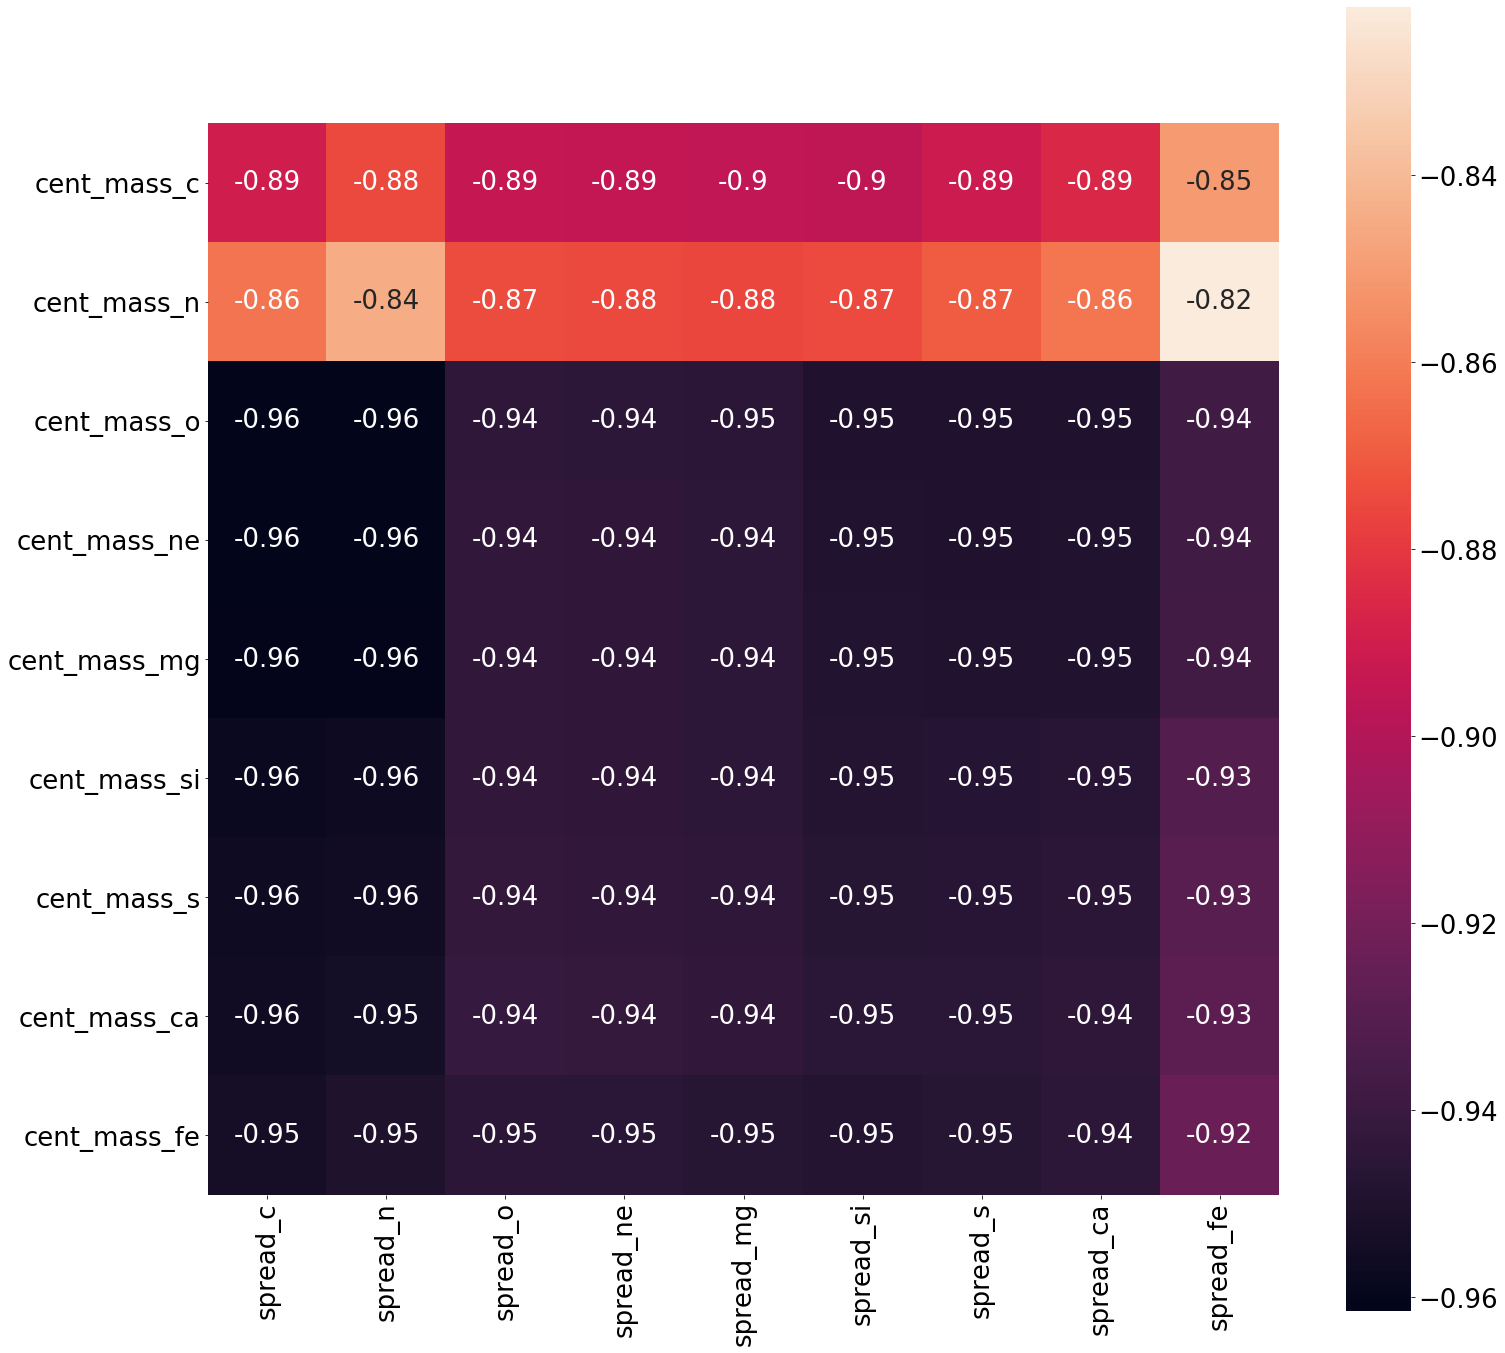

In [10]:
spread_cent_mass_corr = pd.concat([cent_mass_df, spread_df], axis=1, keys=['cent_mass_df', 'spread_df']).corr().loc['cent_mass_df', 'spread_df']
print(spread_cent_mass_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_cent_mass_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_cent_mass_corr.png')
plt.show()
plt.close()

             spread_c  spread_n  spread_o  spread_ne  spread_mg  spread_si  \
cent_vol_c  -0.896880 -0.883276 -0.899396  -0.900417  -0.901181  -0.901953   
cent_vol_n  -0.870833 -0.852908 -0.881331  -0.882423  -0.883093  -0.882370   
cent_vol_o  -0.960490 -0.961023 -0.941838  -0.942401  -0.943285  -0.947828   
cent_vol_ne -0.960209 -0.960832 -0.941067  -0.941634  -0.942526  -0.947292   
cent_vol_mg -0.959911 -0.960458 -0.941073  -0.941644  -0.942536  -0.947153   
cent_vol_si -0.956988 -0.956311 -0.941045  -0.941641  -0.942517  -0.946177   
cent_vol_s  -0.955939 -0.955059 -0.940513  -0.941116  -0.942000  -0.945496   
cent_vol_ca -0.954955 -0.953963 -0.940064  -0.940677  -0.941567  -0.944823   
cent_vol_fe -0.953644 -0.950937 -0.943256  -0.943864  -0.944759  -0.946593   

             spread_s  spread_ca  spread_fe  
cent_vol_c  -0.897870  -0.892085  -0.857857  
cent_vol_n  -0.877147  -0.870049  -0.830637  
cent_vol_o  -0.948205  -0.947767  -0.935745  
cent_vol_ne -0.947745  -0.947379  -

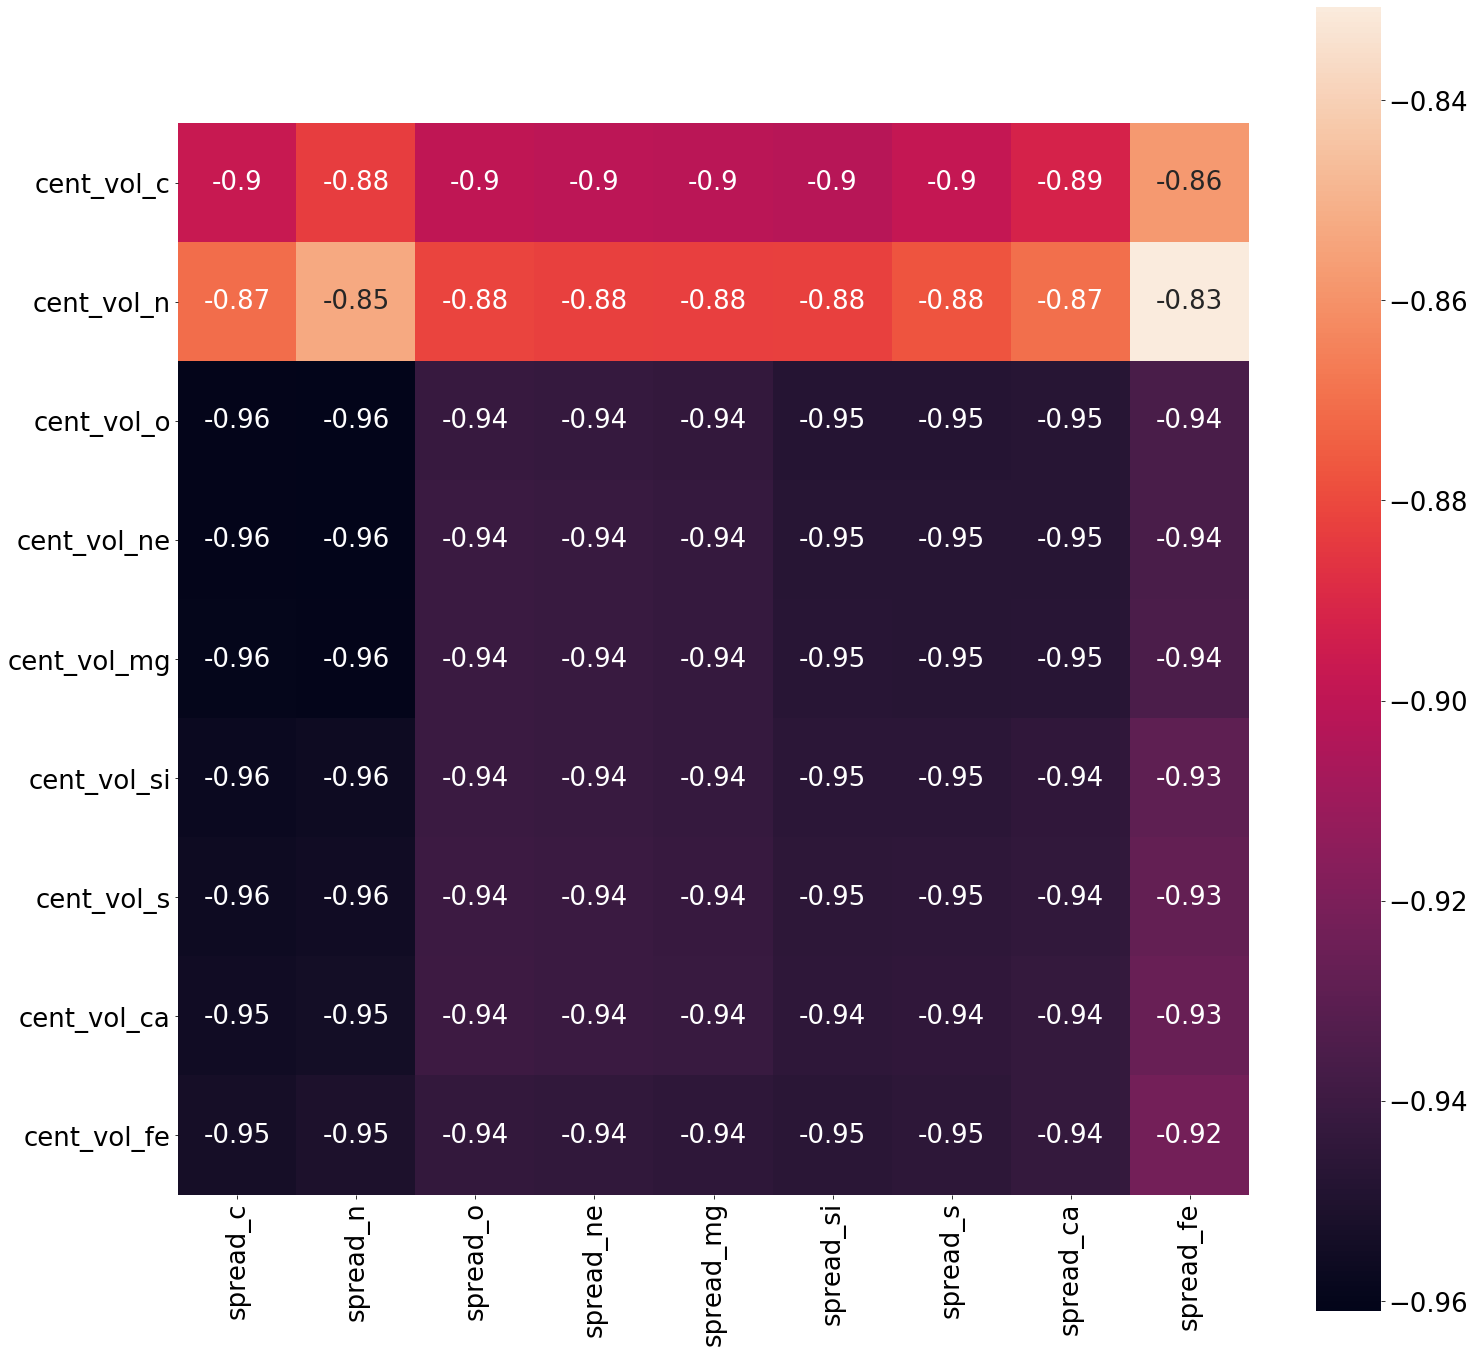

In [11]:
spread_cent_vol_corr = pd.concat([cent_vol_df, spread_df], axis=1, keys=['cent_vol_df', 'spread_df']).corr().loc['cent_vol_df', 'spread_df']
print(spread_cent_vol_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(spread_cent_vol_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/spread_cent_vol_corr.png')
plt.show()
plt.close()

In [12]:
fe_columns = ['spread_fe', 'cent_mass_fe', 'cent_vol_fe']
fe_df = pd.DataFrame({'spread_fe': params_df['fe']['std'], 'cent_mass_fe': params_df['fe']['median_mass'],
                     'cent_vol_fe': params_df['fe']['median_vol']})

print(fe_df)

     spread_fe  cent_mass_fe  cent_vol_fe
0     0.390091     -2.449245    -2.469246
1     0.382483     -2.376410    -2.467793
2     0.348710     -2.287295    -2.458913
3     0.374076     -2.291107    -2.313992
4     0.329160     -2.094939    -1.877695
..         ...           ...          ...
446   0.139652     -1.240304    -1.266098
447   0.139226     -1.239636    -1.263901
448   0.137825     -1.239873    -1.262978
449   0.137703     -1.238785    -1.251318
450   0.133873     -1.238835    -1.251067

[451 rows x 3 columns]


              SFR@10Myr  SFR@100Myr  SFR@1000Myr  halo_mass  velocity_mass  \
spread_fe      0.170994    0.235683     0.809020  -0.812712      -0.704808   
cent_mass_fe  -0.234992   -0.308519    -0.840297   0.898328       0.837379   
cent_vol_fe   -0.247264   -0.302141    -0.837804   0.894665       0.833719   

              sound_mass  thermal_mass  velocity_vol  sound_vol  thermal_vol  \
spread_fe       0.900778      0.900778     -0.756716   0.915120     0.915121   
cent_mass_fe   -0.958181     -0.958181      0.870532  -0.979632    -0.979632   
cent_vol_fe    -0.955270     -0.955270      0.865077  -0.976910    -0.976910   

              mach_number_mass  mach_number_vol  
spread_fe            -0.759491        -0.777740  
cent_mass_fe          0.875062         0.889867  
cent_vol_fe           0.869462         0.884178  


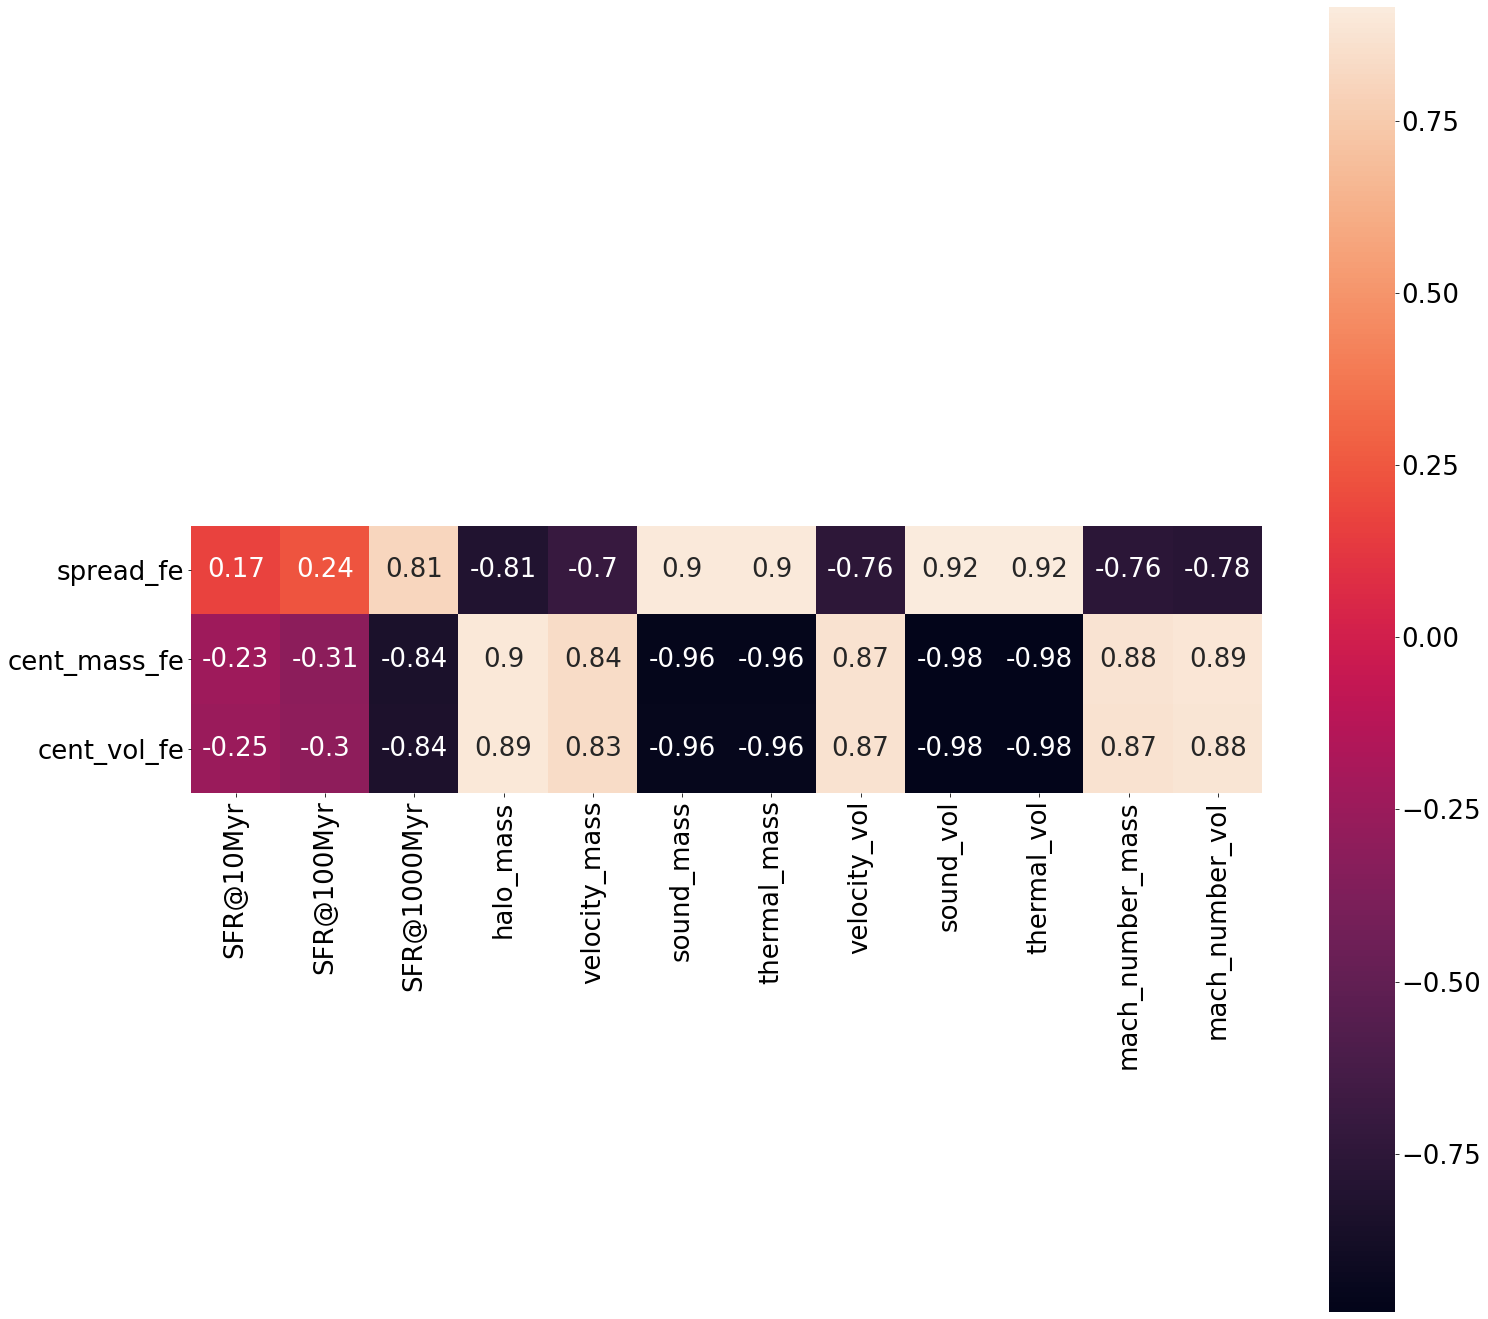

In [13]:
phy_df = fitted_df[['SFR@10Myr', 'SFR@100Myr', 'SFR@1000Myr', 'halo_mass', 'velocity_mass', 'sound_mass', 
                        'thermal_mass','velocity_vol', 'sound_vol', 'thermal_vol', 'mach_number_mass', 
                        'mach_number_vol']].copy()

phy_chem_corr = pd.concat([fe_df, phy_df], axis=1, keys=['fe_df', 'phy_df']).corr().loc['fe_df', 'phy_df']
print(phy_chem_corr)

plt.subplots(figsize = (24, 24))
sns.heatmap(phy_chem_corr, annot = True, square = True)
plt.savefig(sdir + 'correlation_plots/phy_fe_corr.png')
plt.show()
plt.close()

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


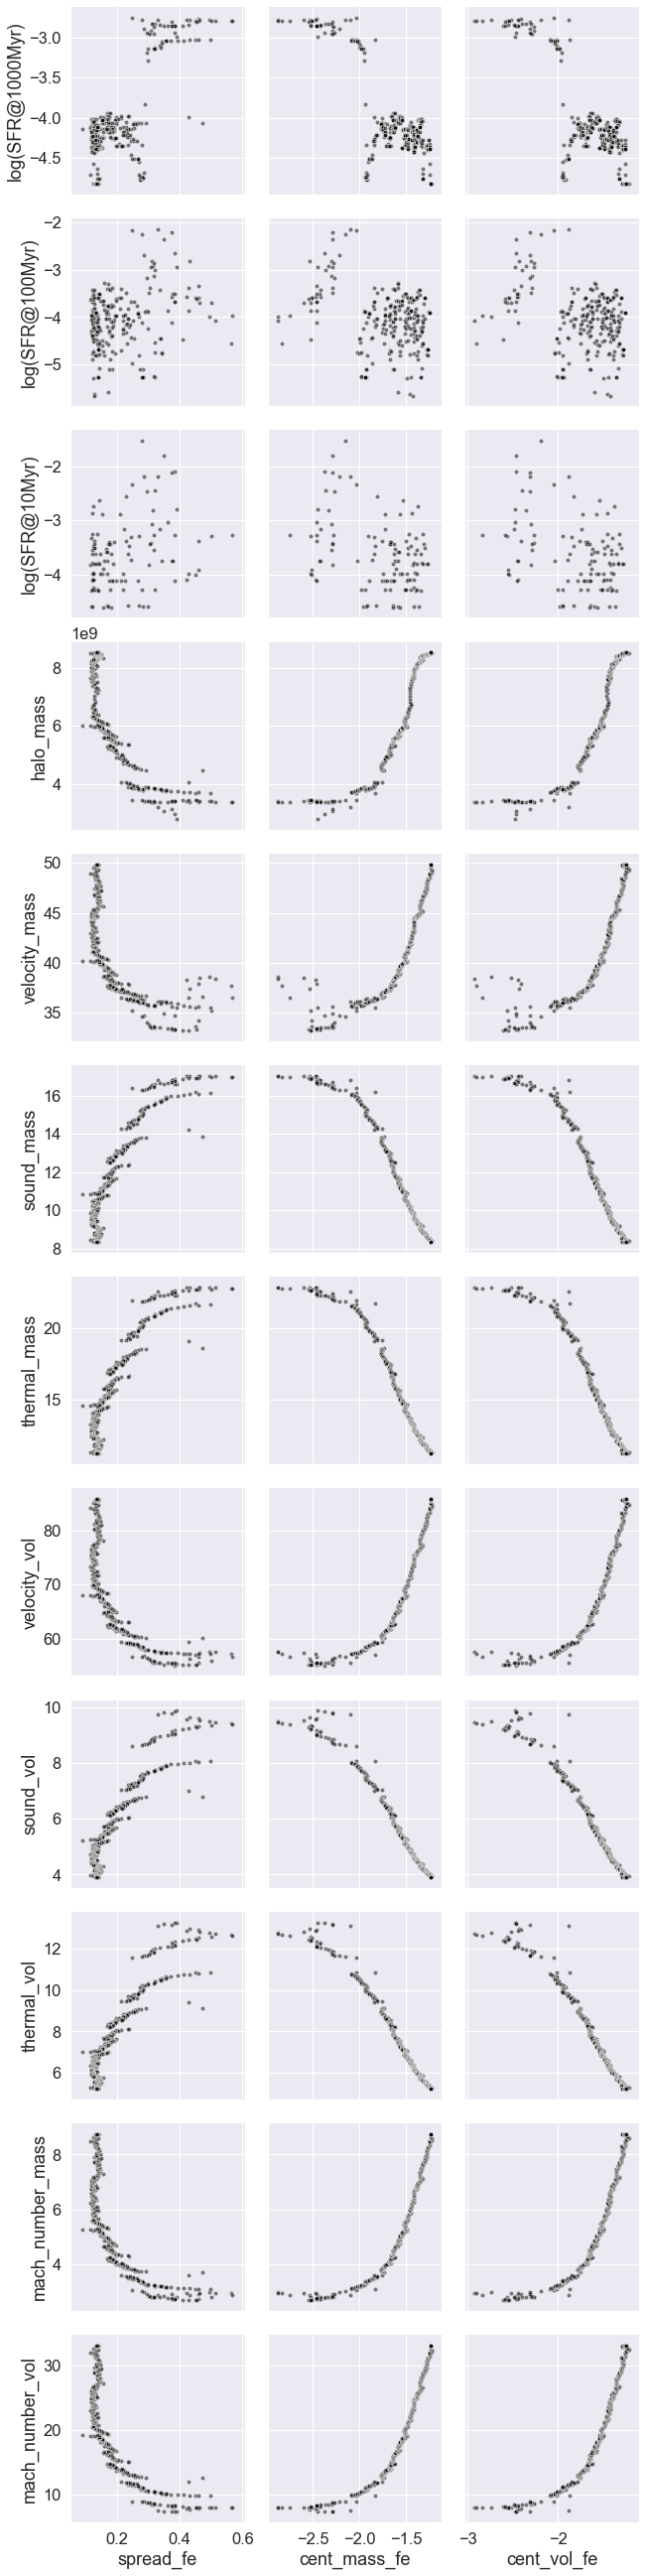

In [14]:
phy_fe_df = pd.concat([fe_df, phy_df], axis = 1)
phy_fe_df['SFR@10Myr'] = np.log10(phy_fe_df['SFR@10Myr'])
phy_fe_df['SFR@100Myr'] = np.log10(phy_fe_df['SFR@100Myr'])
phy_fe_df['SFR@1000Myr'] = np.log10(phy_fe_df['SFR@1000Myr'])

phy_fe_df = phy_fe_df.rename(columns = {'SFR@10Myr': 'log(SFR@10Myr)', 'SFR@100Myr': 'log(SFR@100Myr)',
                                        'SFR@1000Myr': 'log(SFR@1000Myr)'})

sns.set(font_scale = 1.5)
scat_mat = sns.pairplot(phy_fe_df, x_vars = ['spread_fe', 'cent_mass_fe', 'cent_vol_fe'],
            y_vars = ['log(SFR@1000Myr)', 'log(SFR@100Myr)', 'log(SFR@10Myr)', 'halo_mass', 
                      'velocity_mass', 'sound_mass', 'thermal_mass',
                      'velocity_vol', 'sound_vol', 'thermal_vol', 
                      'mach_number_mass', 'mach_number_vol'], height = 3, aspect = 1, 
                        plot_kws={'s': 20, 'alpha': 0.5, 'color': 'black', 'edgecolors': None})
scat_mat.savefig(sdir + 'correlation_plots/phy_fe_scatter_matrix.pdf')